# Face classifier

## Set up

In [1]:
# 3rd party imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Local imports
from facecls import eda

## Load data

In [3]:
data = pd.read_csv("data/age_gender.csv")

## EDA

In [4]:
data.shape

(23705, 5)

In [5]:
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


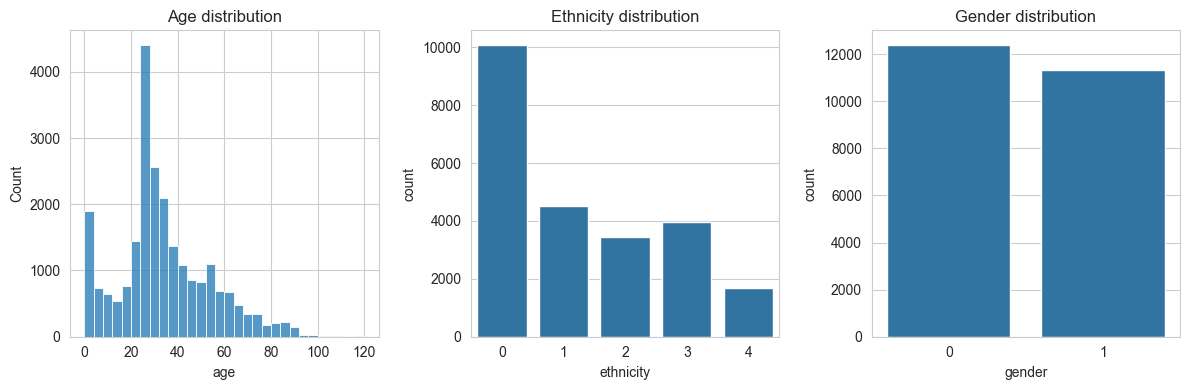

In [7]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(1,3, figsize=(12,4))
sns.histplot(data = data, 
             x="age", 
             binrange=(0,120),
             bins=30,
             ax=axs[0]
             )
axs[0].set_title("Age distribution")

sns.countplot(data = data, 
             x="ethnicity", 
             ax=axs[1]
             )
axs[1].set_title("Ethnicity distribution")

sns.countplot(data = data, 
             x="gender", 
             ax=axs[2]
             )
axs[2].set_title("Gender distribution")
plt.tight_layout()
plt.show()

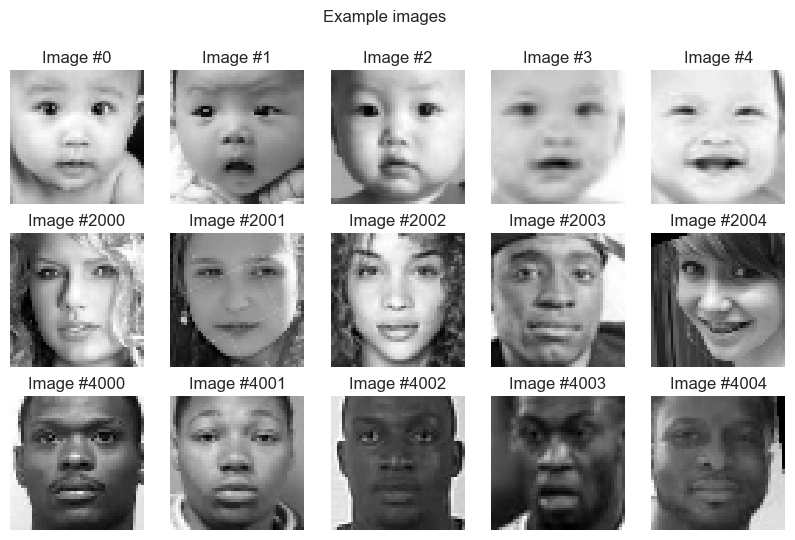

In [8]:
fig, axs = plt.subplots(3,5, figsize=(10,6))

for i in range(3):
    for j in range(5):
        img = eda.pxlvec2pxlarray(eda.pxlstring2pxlvec(data,i*2000+j))
        axs[i,j].imshow(img, interpolation = "nearest", cmap="gray")
        axs[i,j].axis("off")
        axs[i,j].set_title(f"Image #{i*2000+j}")

fig.suptitle("Example images")
plt.show()